In [54]:
from __future__ import division
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as ma
from numpy.linalg import inv
from ipywidgets import *
%matplotlib inline

# 0. Los datos

In [3]:
columns = ['ell', 'Cl', 'se', 'measerr', 'cosmic']
df = pd.read_csv("wmap.dat.txt", sep="\s+", usecols=columns)
df.head()

,ell,Cl,se,measerr,cosmic
0,2,123.382,762.6369,3.3813,759.2556
1,3,611.775,608.1737,4.0262,604.1475
2,4,756.616,503.9580,4.3394,499.6186
3,5,1256.700,432.1765,4.5485,427.6281
4,6,696.479,380.1810,4.7410,375.4400


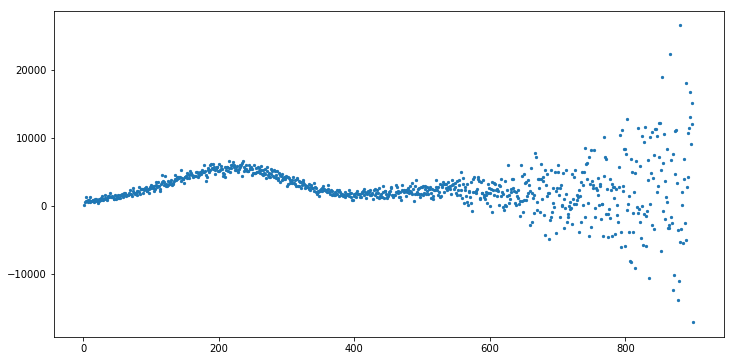

In [4]:
x = X = list(df['ell'])
y = Y = list(df['Cl'])
n = len(X)
plt.figure(figsize=(12,6))
plt.scatter(X,Y,s=5)

# 1. Escoger un método de de suavizamiento

### 1.1 Regresión con Kernel

In [ ]:
@interact(h=widgets.FloatSlider(
    value=10,
    min=0.1,
    max=20,
    step=1))
def ploting(h):
    K = lambda x: 1/(ma.sqrt(2*ma.pi))*ma.exp(-(x**2)/2)
    def rn(x,h):
        n = len(X)
        l = [K((x-X[i])/h) for i in range(n)]
        return sum(l[i]*Y[i] for i in range(n))/sum(l)
    plt.figure(figsize=(12,6))
    plt.scatter(X,Y,s=5)
    plt.plot(np.arange(0.1,900,5),[rn(x,h) for x in np.arange(0.1,900,5)],color='red')

### 1.2 Splines

In [50]:
def Spline1(l):
    n = len(x)
    K = len(Nots)
    X = np.matrix([[1] + [x[i]] + [max(x[i]-t,0) for t in Nots] for i in range(n)])
    D = np.matrix([[0 for i in range(K+2)],[0 for i in range(K+2)]]+[[(j==i-2)*1 for i in range(K+2)] for j in range(K)])
    b = y*(inv(X.T*X+(l**2)*D)*X.T).T
    b = list(b.getA1())
    f = lambda x:b[0]+b[1]*x + sum(b[j+2]*max((x-Nots[j]),0) for j in range(K))
    plt.figure(figsize=(12,6))
    plt.scatter(x,y,s=5)
    plt.plot(np.arange(0,n,1),[f(x) for x in np.arange(0,n,1)],color="red")

In [51]:
#Nots = [int(x) for x in input().split()]
Nots = [y for y in x if y%2 ==0]
interact(Spline1,l=(0.1,200))

interactive(children=(FloatSlider(value=100.05, description='l', max=200.0, min=0.1), Output()), _dom_classes=…

<function __main__.Spline1(l)>

In [49]:
x[n-1]

900

In [66]:
def SplineP(l):
    n = len(x)
    K = len(Nots)
    X = np.matrix([[x[i]**p for p in range(p+1)]+[max((x[i]-t)**p,0) for t in Nots] for i in range(n)])
    D = np.matrix([[0 for i in range(K+p+1)] for j in range(p+1)]+[[(j==i-p-1)*1 for i in range(K+p+1)] for j in range(K)])
    b = y*(inv(X.T*X+(l**(2*p))*D)*X.T).T
    b = list(b.getA1())
    f = lambda u:sum(b[i]*(u**i) for i in range(p+1)) + sum(b[j+p+1]*max((u-Nots[j])**p,0) for j in range(K))
    plt.figure(figsize=(12,6))
    plt.scatter(x,y,s=5)
    plt.plot(np.arange(0,n,1),[f(u) for u in np.arange(0,n,1)],color="red")

In [73]:
max((500-Nots[0])**p,0)

64000000

In [67]:
p = int(input('p = '))
Nots = [int(x) for x in input().split()]
interact(SplineP,l=widgets.FloatText(value=7.5,description='l:', disabled=False))

p = 3
100


interactive(children=(FloatText(value=7.5, description='l:'), Output()), _dom_classes=('widget-interact',))

<function __main__.SplineP(l)>

# 2. Escoger $h$ o $\lambda$ usando validación cruzada

# 3. Estimar $\hat{\sigma}^{2}(x)$

# 4. Encontrar una banda de confianza $1-\alpha$ 
## $$ \hat{r}_n(x)\pm c\ \hat{\sigma}^{2}(x)||l(x)||$$